# Prophet - example 1

This is the [Quick Start](https://facebook.github.io/prophet/docs/quick_start.html#python-api) tutorial for the [Prophet](https://github.com/facebook/prophet) library.

## Daily page views for the Wikipedia page for Peyton Manning

> As an example, let’s look at a time series of daily page views for the Wikipedia page for Peyton Manning. We scraped this data using the Wikipediatrend package in R. Peyton Manning provides a nice example because it illustrates some of Prophet’s features, like multiple seasonality, changing growth rates, and the ability to model special days (such as Manning’s playoff and superbowl appearances). The CSV is available [here](https://github.com/facebook/prophet/blob/master/examples/example_wp_peyton_manning.csv).

> The input to Prophet is always a dataframe with two columns: `ds` and `y`. The `ds` (datestamp) column must contain a `date` or `datetime` (either is fine). The `y` column must be numeric, and represents the measurement we wish to forecast.

### Imports

In [1]:
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("Pandas version: {}".format(pd.__version__))
import numpy as np
print("Numpy version: {}".format(np.__version__))
import fbprophet as Prophet
print("Prophet version: {}".format(Prophet.__version__))

%matplotlib inline

Python version: 3.6.5 |Anaconda, Inc.| (default, Apr 29 2018, 16:14:56) 
[GCC 7.2.0]
Pandas version: 0.23.0
Numpy version: 1.14.3
Prophet version: 0.2.1


### Loading the data

First we’ll import the data and log-transform the `y` variable.

In [2]:
df = pd.read_csv('../../data/example_wp_peyton_manning.csv', parse_dates=['ds'])
df['y'] = np.log(df['y'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2905 entries, 0 to 2904
Data columns (total 2 columns):
ds    2905 non-null datetime64[ns]
y     2905 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 45.5 KB


In [4]:
df.head(2)

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590


In [5]:
df.tail(2)

,ds,y
2903,2016-01-19,9.125871
2904,2016-01-20,8.891374


Text(0.5,0,'Date')

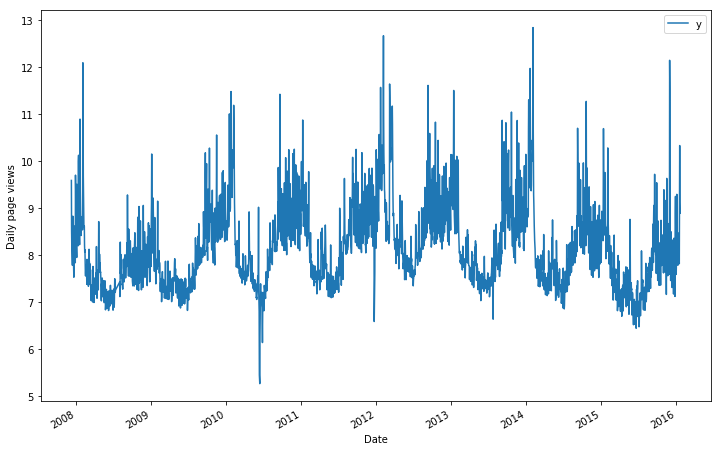

In [6]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Daily page views')
ax.set_xlabel('Date')

### Fitting

> We fit the model by instantiating a new Prophet object. Any settings to the forecasting procedure are passed into the constructor. Then you call its `fit` method and pass in the historical dataframe. Fitting should take 1-5 seconds.

In [7]:
m = Prophet.Prophet(daily_seasonality=False)
m.fit(df)

/home/francois/anaconda3/envs/time_series/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


### Create the prediction container

> Predictions are then made on a dataframe with a column `ds` containing the dates for which a prediction is to be made. You can get a suitable dataframe that extends into the future a specified number of days using the helper method `Prophet.make_future_dataframe`. By default it will also include the dates from the history, so we will see the model fit as well.

In [8]:
future = m.make_future_dataframe(periods=365)

In [9]:
future.head(2)

,ds
0,2007-12-10
1,2007-12-11


In [10]:
future.tail(2)

,ds
3268,2017-01-18
3269,2017-01-19


### Predict

> The `predict` method will assign each row in future a predicted value which it names `yhat.` If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column `yhat` with the forecast, as well as columns for components and uncertainty intervals.

In [11]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

/home/francois/anaconda3/envs/time_series/lib/python3.6/site-packages/fbprophet/forecaster.py:1010: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = seasonal_features.as_matrix()
/home/francois/anaconda3/envs/time_series/lib/python3.6/site-packages/fbprophet/forecaster.py:1134: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  seasonal = np.matmul(seasonal_features.as_matrix(), beta) * self.y_scale


,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.206753,7.441901,8.874625
3266,2017-01-16,8.531766,7.806148,9.252836
3267,2017-01-17,8.319156,7.572289,8.999396
3268,2017-01-18,8.151772,7.454857,8.913071
3269,2017-01-19,8.163690,7.451419,8.922055


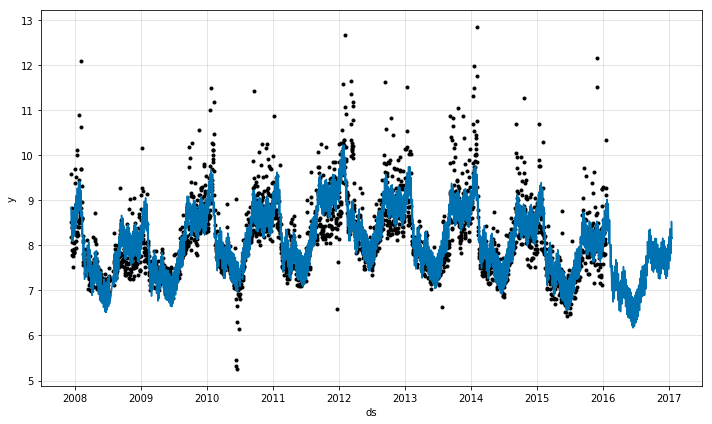

In [12]:
m.plot(forecast, uncertainty=False);

If you want to see the forecast components, you can use the `Prophet.plot_components` method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.

/home/francois/anaconda3/envs/time_series/lib/python3.6/site-packages/fbprophet/forecaster.py:1010: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = seasonal_features.as_matrix()


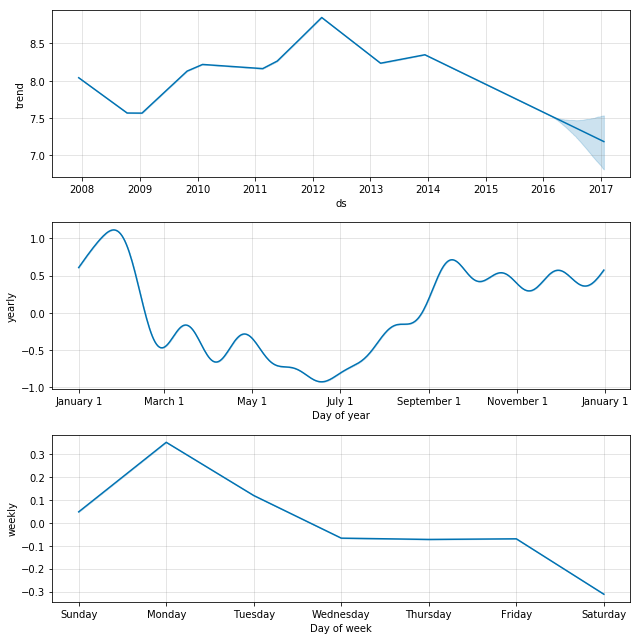

In [13]:
m.plot_components(forecast);